In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path = untar_data(URLs.MNIST)
path

PosixPath('/home/jupyter/.fastai/data/mnist_png')

In [4]:
tfms = get_transforms(do_flip=False)
path.ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/testing'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training')]

In [5]:
data = (ImageList.from_folder(path/"training")
        .split_by_rand_pct()          
        .label_from_folder()
        .transform(tfms, size=32)
        .databunch()
        .normalize(imagenet_stats))

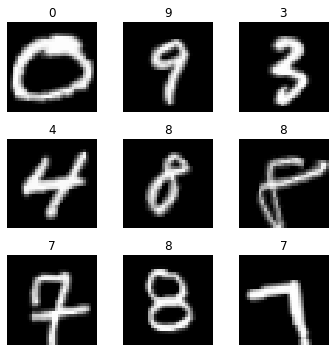

In [6]:
data.show_batch(rows=3, figsize=(5, 5))

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


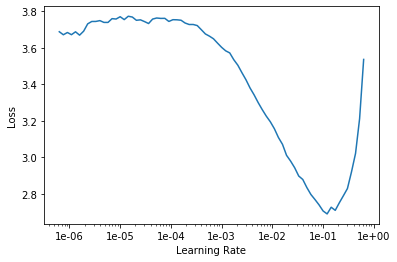

In [8]:
learn.lr_find()
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(3, max_lr=slice(1e-5, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.807347,0.491290,0.843333,02:41
1,0.433431,0.242534,0.923417,00:37
2,0.356370,0.209028,0.934583,00:37


In [10]:
interp = ClassificationInterpretation.from_learner(learn)

In [11]:
interp.most_confused(min_val=2)

[('2', '5', 50),
 ('8', '5', 45),
 ('9', '7', 36),
 ('3', '5', 35),
 ('2', '3', 33),
 ('8', '2', 31),
 ('5', '3', 27),
 ('7', '4', 27),
 ('3', '2', 25),
 ('4', '7', 24),
 ('8', '9', 22),
 ('2', '8', 21),
 ('7', '9', 19),
 ('9', '4', 19),
 ('9', '8', 17),
 ('0', '6', 16),
 ('3', '8', 16),
 ('4', '9', 16),
 ('8', '3', 16),
 ('5', '8', 13),
 ('3', '7', 12),
 ('5', '2', 12),
 ('8', '0', 12),
 ('8', '6', 11),
 ('6', '0', 10),
 ('8', '4', 10),
 ('9', '0', 10),
 ('9', '3', 10),
 ('1', '4', 9),
 ('4', '6', 9),
 ('4', '8', 9),
 ('7', '2', 9),
 ('9', '2', 9),
 ('2', '7', 8),
 ('7', '8', 8),
 ('4', '1', 7),
 ('1', '7', 6),
 ('2', '4', 6),
 ('6', '4', 6),
 ('6', '8', 6),
 ('7', '3', 6),
 ('8', '1', 6),
 ('8', '7', 6),
 ('9', '5', 6),
 ('5', '6', 5),
 ('6', '5', 5),
 ('0', '2', 4),
 ('2', '0', 4),
 ('2', '1', 4),
 ('7', '5', 4),
 ('0', '1', 3),
 ('1', '2', 3),
 ('1', '5', 3),
 ('2', '9', 3),
 ('3', '9', 3),
 ('7', '1', 3),
 ('9', '1', 3),
 ('0', '3', 2),
 ('0', '5', 2),
 ('0', '8', 2),
 ('0', '9', 

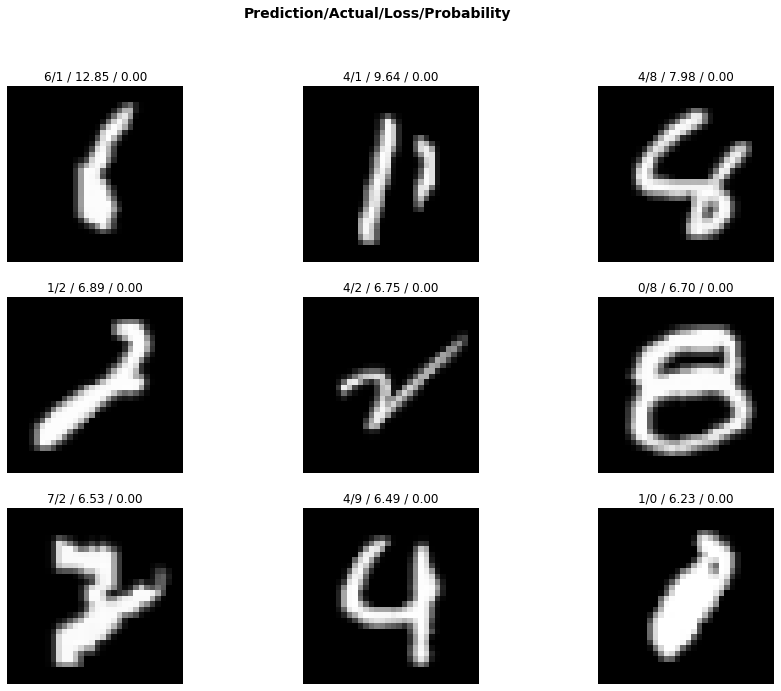

In [12]:
interp.plot_top_losses(9, figsize=(15,11))